<a href="https://colab.research.google.com/github/sathvik2076/Python1/blob/main/1%2C3_02_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/content/Reviews.csv",nrows=1000)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [5]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [6]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text']=df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text']=df['Text'].str.replace('[^\w\s]','')
stop=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text']=df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text']=df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Text'].head()

KeyboardInterrupt: 

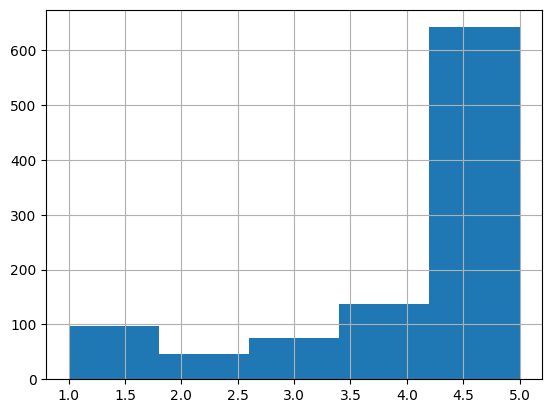

Score
1     98
2     47
3     75
4    138
5    642
Name: Id, dtype: int64


In [8]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=True)
plt.show()
print(reviews.groupby('Score').count().Id)

In [9]:
score_1=reviews[reviews['Score']==1].sample(n=47)
score_2=reviews[reviews['Score']==2].sample(n=47)
score_3=reviews[reviews['Score']==3].sample(n=47)
score_4=reviews[reviews['Score']==4].sample(n=47)
score_5=reviews[reviews['Score']==5].sample(n=47)

In [10]:
reviews_sample=pd.concat([score_1,score_2,score_3,score_4,score_5])
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    47
2    47
3    47
4    47
5    47
Name: Id, dtype: int64


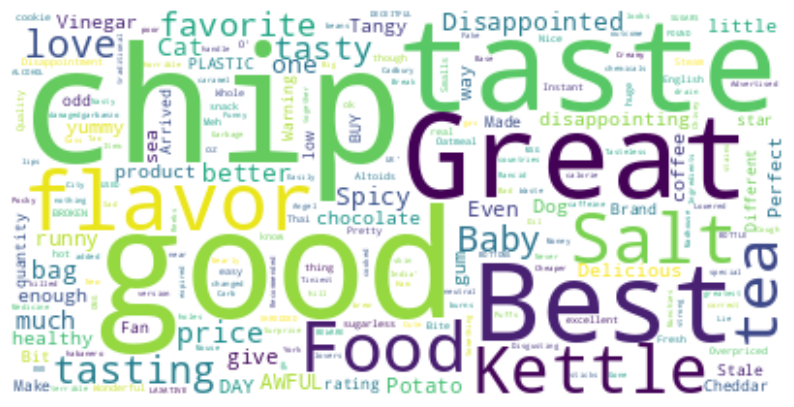

In [11]:
from wordcloud import WordCloud
reviews_str=' '.join(reviews_sample['Summary'].to_numpy())
wordcloud=WordCloud(background_color='white').generate((reviews_str))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
negative=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive=reviews_sample[reviews_sample['Score'].isin([4,5])]

negative_reviews_str=negative.Summary.str.cat()
postive_reviews_str=positive.Summary.str.cat()

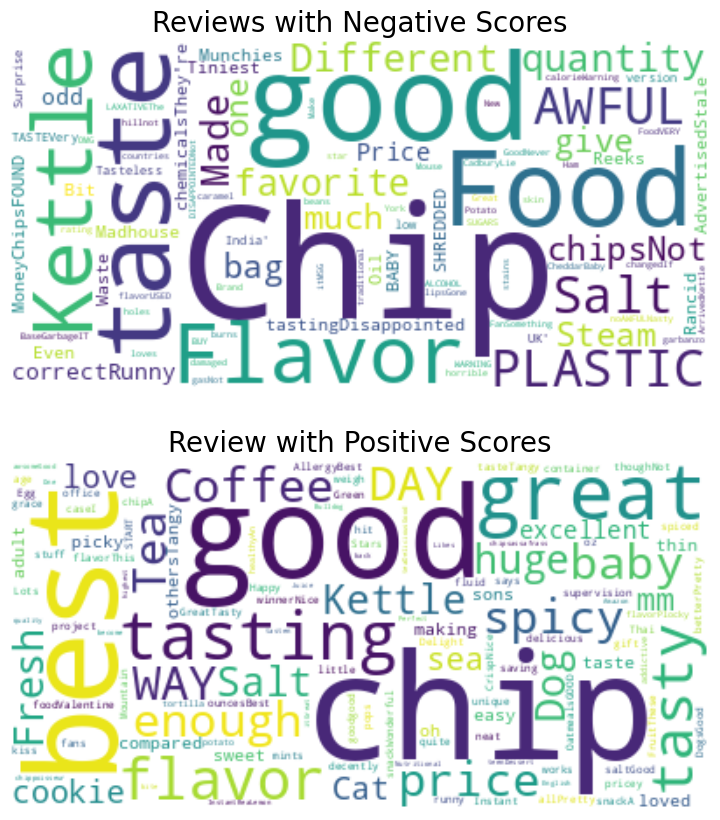

In [16]:
wordcloud_negative=WordCloud(background_color='white')\
.generate(negative_reviews_str)
wordcloud_positive=WordCloud(background_color='white')\
.generate(postive_reviews_str)
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,1,1)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2=fig.add_subplot(2,1,2)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Review with Positive Scores',fontsize=20)
plt.show()

In [19]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00


In [20]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
cp=sns.color_palette()
analyzer=SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
  vs=analyzer.polarity_scores(row)
  emptyline.append(vs)


In [23]:
df.sentiments=pd.DataFrame(emptyline)
df.sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.160,0.578,0.262,0.7926
3,0.000,0.868,0.132,0.4404
4,0.000,0.369,0.631,0.9468
